In [1]:
import pandas as pd
import numpy as np
import time
import os
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
import sklearn as sk
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

/Users/aaronfrederick/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load Dataframe
df = pd.read_pickle('master_df.pkl')

In [3]:
df.describe()

,minutes_played,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,...,tot_r_per_mp,asst_per_mp,steals_per_mp,blocks_per_mp,turnovers_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
count,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,...,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,8769.000000
mean,23.629998,0.356054,0.126500,0.200737,0.132929,0.314650,0.024915,0.073617,0.068836,0.092926,...,0.172712,0.079697,0.030395,0.019744,0.056789,0.106853,0.359609,0.108014,2008.280120,0.453822
std,12.450294,0.232994,0.214042,0.308157,0.105971,0.235503,0.054057,0.114940,0.130502,0.154885,...,0.149351,0.105866,0.113325,0.045364,0.105314,0.143405,0.280821,0.096712,5.618026,0.271328
min,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000
25%,13.870833,0.200000,0.000000,0.000000,0.059754,0.200955,0.000000,0.000000,0.000000,0.000000,...,0.074089,0.000000,0.000000,0.000000,0.000000,0.040000,0.179138,0.034642,2003.000000,0.300000
50%,24.000000,0.400000,0.000000,0.000000,0.126582,0.303638,0.000000,0.040000,0.037037,0.061053,...,0.147783,0.057143,0.000000,0.000000,0.041667,0.084181,0.337719,0.097680,2009.000000,0.500000
75%,34.000000,0.500000,0.250000,0.500000,0.190476,0.414634,0.038462,0.121212,0.107768,0.142857,...,0.243367,0.120000,0.047619,0.027829,0.083333,0.138616,0.505145,0.161204,2014.000000,0.600000
max,54.000000,0.917000,0.857000,0.944000,1.875000,15.000000,1.463415,5.454545,6.315789,6.315789,...,2.068966,5.000000,10.000000,1.621622,7.500000,7.500000,6.315789,1.875000,2017.000000,1.000000


In [4]:
df.corr()

,minutes_played,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,...,tot_r_per_mp,asst_per_mp,steals_per_mp,blocks_per_mp,turnovers_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
minutes_played,1.000000,0.500780,0.335974,0.391712,0.277134,0.144938,0.078654,0.042705,0.121400,0.109944,...,0.010182,0.139785,0.006290,0.003405,-0.011355,-0.216829,0.280717,0.259704,-0.047571,0.149219
fg_pct,0.500780,1.000000,0.296851,0.208696,0.578436,0.198014,0.181367,0.030153,0.065718,0.060649,...,0.067993,0.053221,0.000252,0.025623,-0.014245,-0.112760,0.502012,0.532442,-0.004845,0.524160
3_pct,0.335974,0.296851,1.000000,0.070129,0.243780,0.150591,0.555158,0.421374,0.013046,-0.011657,...,-0.148353,0.099702,0.012051,-0.109543,-0.010057,-0.106180,0.296915,-0.043183,0.091797,0.006989
ft_pct,0.391712,0.208696,0.070129,1.000000,0.162937,0.093718,-0.022376,-0.045640,0.328500,0.421418,...,0.080573,0.048156,0.007754,0.036366,0.024707,-0.060346,0.271324,0.191044,-0.051149,0.083985
fg_per_mp,0.277134,0.578436,0.243780,0.162937,1.000000,0.485872,0.418859,0.193459,0.084668,0.081811,...,0.087572,0.044485,0.025846,-0.000043,-0.011506,-0.047189,0.874699,0.861622,0.026546,0.550880
fga_per_mp,0.144938,0.198014,0.150591,0.093718,0.485872,1.000000,0.217105,0.376316,0.045040,0.035795,...,0.047200,0.044134,0.021057,-0.021915,-0.000562,-0.061306,0.429422,0.411040,0.023738,-0.038474
fg3_per_mp,0.078654,0.181367,0.555158,-0.022376,0.418859,0.217105,1.000000,0.613082,-0.020783,-0.044832,...,-0.116317,0.057521,-0.003444,-0.081241,-0.020511,-0.074401,0.498960,-0.099984,0.106524,-0.025507
fg3a_per_mp,0.042705,0.030153,0.421374,-0.045640,0.193459,0.376316,0.613082,1.000000,-0.032568,-0.060403,...,-0.154517,0.059020,0.001219,-0.101005,-0.013587,-0.086429,0.248889,-0.130699,0.145523,-0.034487
ft_per_mp,0.121400,0.065718,0.013046,0.328500,0.084668,0.045040,-0.020783,-0.032568,1.000000,0.925848,...,0.051403,0.003647,-0.005312,0.017246,0.004752,-0.024906,0.524615,0.104390,-0.029899,0.068734
fta_per_mp,0.109944,0.060649,-0.011657,0.421418,0.081811,0.035795,-0.044832,-0.060403,0.925848,1.000000,...,0.088499,-0.008407,-0.007111,0.026811,0.001556,-0.016607,0.483370,0.114703,-0.037336,0.077253


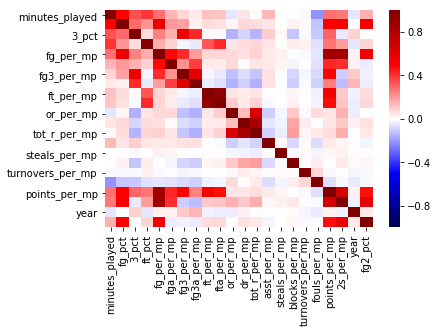

In [5]:
#Heatmap
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='seismic')

In [6]:
#Pairplot -- currently commented out to save computation time (very slow!)
#sns.pairplot(df)

## Initial Modeling with Linear Regression
Because the data doesn't require feature reduction, I will be analyzing this data set with a 70/30 Train/Test split.  

In [7]:
#Splitting Training/Testing Data
df = df.dropna()

X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
#Modeling with scikitlearn
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.37680314983321206

In [9]:
simple_df = pd.DataFrame([model.coef_])
simple_df.columns = X.columns
simple_df.drop(columns = ['steals_per_mp','blocks_per_mp','turnovers_per_mp','tot_r_per_mp'], axis=1)

,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,15.78613,16.312808,11.774078,-8.915932,-1.645967,-31.526698,7.164258,42.88621,-32.42196,-5.547212,5.520069,12.427552,-25.167044,-6.472353,22.610766,-0.12626,-2.20093


Text(0.5, 1.0, 'Model Prediction vs Testing Data')

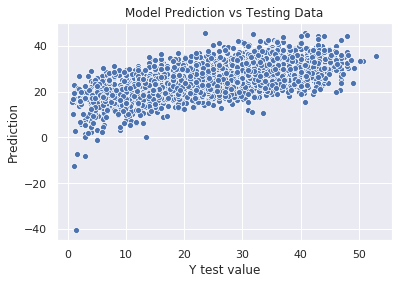

In [10]:
#Visualizing Prediction vs Actual Test Data
sns.set()
sns.scatterplot(y_test, model.predict(X_test))#, label='Linear Regression')
plt.xlabel('Y test value')
plt.ylabel('Prediction')
plt.title('Model Prediction vs Testing Data')

## Looking into playing time vs. salary
Using the analyses prior to discover which aspects of the game lead to most playing time, I'll be pursuing a dollar amount to assign to that improvement.

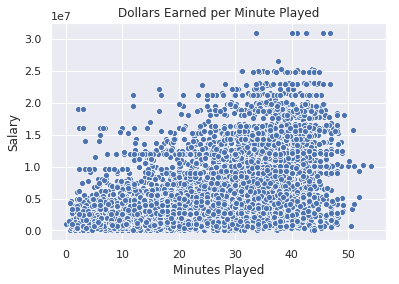

In [11]:
pay_df = pd.read_pickle('merged_df.pkl')
#pay_df
sns.scatterplot(x=pay_df['minutes_played'], y=pay_df['salary']).set_title('Dollars Earned per Minute Played')
plt.xlabel('Minutes Played')
plt.ylabel('Salary')
plt.show()

## Feature reduction on dataframe
Here we will remove the columns that appear white on the heatmap or can be calculated from other factors.
These dropped features include:
- Total rebounds per minute
- Steals per minute
- Blocks per minute
- Field goals per minute
- Field goals attempted per minute
- 3-pointers attempted per minute

In [12]:
pay_df = pay_df.drop(columns = ['tot_r_per_mp', 'steals_per_mp', 'blocks_per_mp',
                                'fg_per_mp', 'fga_per_mp', 'fg3a_per_mp', 'fta_per_mp',
                               'season_end', 'turnovers_per_mp'])
pay_df

,minutes_played,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,name,salary,team
0,37.000000,0.357,0.750,0.875,0.081081,0.189189,0.000000,0.081081,0.054054,0.054054,0.540541,0.054054,2003,0.200000,"Jones,Eddie",11212500.0,MIA
1,32.000000,0.667,0.000,0.750,0.062500,0.093750,0.031250,0.031250,0.093750,0.093750,0.781250,0.250000,2003,0.615385,"Butler,Caron",1678800.0,MIA
2,30.000000,0.333,0.000,0.000,0.000000,0.066667,0.066667,0.133333,0.033333,0.100000,0.266667,0.100000,2003,0.333333,"Allen,Malik",512435.0,MIA
3,29.000000,0.750,0.000,0.500,0.000000,0.034483,0.068966,0.137931,0.000000,0.103448,0.241379,0.103448,2003,0.750000,"Grant,Brian",11027862.0,MIA
4,2.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,0.000000,"Best,Travis",1400000.0,MIA
5,35.000000,0.333,0.000,0.000,0.000000,0.057143,0.000000,0.085714,0.085714,0.028571,0.285714,0.114286,2003,0.400000,"James,Mike",512435.0,MIA
6,27.000000,0.857,0.000,0.667,0.000000,0.148148,0.111111,0.370370,0.074074,0.037037,0.592593,0.222222,2003,0.857143,"Stepania,Vladimir",1350000.0,MIA
7,23.000000,0.600,0.000,0.000,0.000000,0.086957,0.000000,0.130435,0.347826,0.043478,0.347826,0.130435,2003,0.600000,"Carter,Anthony",3656250.0,MIA
8,13.000000,0.250,0.000,0.800,0.076923,0.615385,0.000000,0.000000,0.000000,0.076923,0.846154,0.000000,2003,0.000000,"Butler,Rasual",349458.0,MIA
9,6.000000,0.500,0.000,0.000,0.000000,0.000000,0.166667,0.166667,0.000000,0.500000,0.333333,0.166667,2003,0.500000,"Marks,Sean",612435.0,MIA


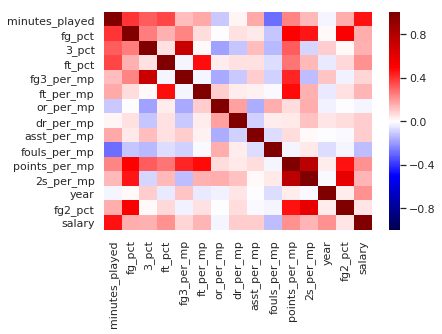

In [13]:
#New, Feature-reduced Heatmap
sns.heatmap(pay_df.corr(), vmin=-1, vmax=1, cmap='seismic')

## Examining which teams give the most playing time

In [14]:
pt_group = pay_df[['team','minutes_played']].groupby(by=['team']).median()
top5 = pt_group.sort_values(by='minutes_played', ascending=False).head()
top5['Team'] = top5.index
top5['Minutes Played Per Game'] = top5.minutes_played

In [15]:
top5

,minutes_played,Team,Minutes Played Per Game
team,,,
MIA,28.616667,MIA,28.616667
MIL,28.008333,MIL,28.008333
DAL,27.016667,DAL,27.016667
LAC,26.991667,LAC,26.991667
NOH,26.800000,NOH,26.800000


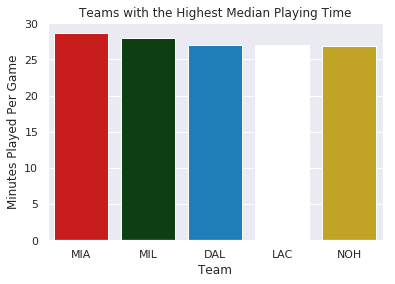

In [16]:
color_order = ['xkcd:red','xkcd:forest green','xkcd:cerulean','w','xkcd:gold']

sns.barplot(x = top5.Team,y=top5['Minutes Played Per Game'], palette=color_order).set_title('Teams with the Highest Median Playing Time')

#plt.xticks(list(top5.Team))

plt.show()

## Examining which teams give the highest median salary

In [17]:
money_group = pay_df[['team','salary']].groupby(by=['team']).median()
top10 = money_group.sort_values(by='salary', ascending=False).head(10)
top10['Team'] = top10.index
top10['Salary'] = top10.salary

In [18]:
top10

,salary,Team,Salary
team,,,
DAL,5750000.0,DAL,5750000.0
CHA,5543725.0,CHA,5543725.0
POR,4991800.0,POR,4991800.0
SAC,4546000.0,SAC,4546000.0
LAL,4420000.0,LAL,4420000.0
PHO,4250000.0,PHO,4250000.0
ORL,4235840.0,ORL,4235840.0
CLE,4172432.0,CLE,4172432.0
NYK,4131720.0,NYK,4131720.0


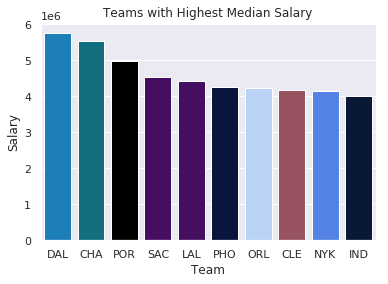

In [19]:
color_order2 = ['xkcd:cerulean', 'xkcd:ocean','xkcd:black','xkcd:royal purple','xkcd:royal purple', 'xkcd:navy blue','xkcd:powder blue', 'xkcd:light maroon', 'xkcd:lightish blue','xkcd:navy']
sns.barplot(x=top10.Team,y=top10.Salary,palette=color_order2).set_title('Teams with Highest Median Salary')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [20]:
X=pay_df.drop(columns=['minutes_played','team','name', 'salary'])
y=pay_df['minutes_played']

In [21]:
##Preps the dataframes for ML
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [22]:
#y_train

Following Visualizes Error vs. Degree polynomial

In [23]:
from sklearn.metrics import mean_squared_error
# Step through degrees from 0 to 4 and store the training and test (generalization) error.
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

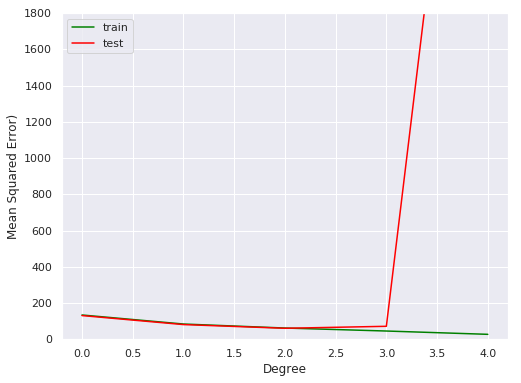

In [24]:
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
plt.ylim((0.0, 1800))
plt.ylabel('Mean Squared Error)')
plt.xlabel('Degree')
plt.legend(loc='upper left')

In [25]:
X_train.shape

(5259, 13)

In [26]:

lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
score = 0
for ratio in range(11):
    model = ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10)
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) > score:
        score = model.score(X_test,y_test)
        optimal_model = model
        optimal_ratio = ratio

print(score)
print(ratio)
#optimal_model.describe()


0.37976578522113746
10


In [27]:
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly.fit(X_train, y_train)
poly.score(X_test,y_test)

0.5356787523162514

## Momentary Breakdown

After doing an initial basic linear model, I found the R2 score to be 0.37.
After modeling using polynomial features of degree 2, R2 became 0.41.
According to ElasticNet Cross-Validation, the optimal lambda value is 1000 and L1-L2 ratio is 1:0 (entirely L1, or Lasso regularization), the R2 value was 0.40.
Below, using a polynomial of degree 2 and alpha values of 1 with Lasso regularization (alpha=1000 proved to be suboptimal), the R2 value is 0.43.

In [28]:
model2 = make_pipeline(PolynomialFeatures(2),ElasticNetCV(alphas=[0],l1_ratio=1))
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5359323444691714

In [29]:
model2.get_params()

{'memory': None,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
  ('elasticnetcv',
   ElasticNetCV(alphas=[0], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
          l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
          positive=False, precompute='auto', random_state=None,
          selection='cyclic', tol=0.0001, verbose=0))],
 'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'elasticnetcv': ElasticNetCV(alphas=[0], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=0),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'elasticnetcv__alphas': [0],
 'elasticnetcv__copy_X': True,
 'elast

## Below we go into modeling using the log(minutes played)
This is largely more successful than the previous tactics for modeling, increasing the R2 value to 0.52! This is almost a 50% improvement from the initial score of 0.37.

In [30]:
##Experimenting with log_pt
import math
log_pt_list = []
for item in pay_df.minutes_played:
    log_pt_list.append(math.log10(item))

pay_df['log_pt'] = log_pt_list
pay_df.head()

,minutes_played,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,name,salary,team,log_pt
0,37.0,0.357,0.75,0.875,0.081081,0.189189,0.000000,0.081081,0.054054,0.054054,0.540541,0.054054,2003,0.200000,"Jones,Eddie",11212500.0,MIA,1.568202
1,32.0,0.667,0.00,0.750,0.062500,0.093750,0.031250,0.031250,0.093750,0.093750,0.781250,0.250000,2003,0.615385,"Butler,Caron",1678800.0,MIA,1.505150
2,30.0,0.333,0.00,0.000,0.000000,0.066667,0.066667,0.133333,0.033333,0.100000,0.266667,0.100000,2003,0.333333,"Allen,Malik",512435.0,MIA,1.477121
3,29.0,0.750,0.00,0.500,0.000000,0.034483,0.068966,0.137931,0.000000,0.103448,0.241379,0.103448,2003,0.750000,"Grant,Brian",11027862.0,MIA,1.462398
4,2.0,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,0.000000,"Best,Travis",1400000.0,MIA,0.301030


In [31]:
X=pay_df.drop(columns=['minutes_played','team','name', 'salary','log_pt'])
y=pay_df['log_pt']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [32]:
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly.fit(X_train, y_train)
poly.score(X_test,y_test)

0.5250543950486428

In [33]:
# lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
# score = 0
# for ratio in range(11):
#     model = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10))
#     model.fit(X_train,y_train)
#     if model.score(X_test,y_test) > score:
#         score = model.score(X_test,y_test)
#         optimal_model = model
#         optimal_ratio = ratio

# print(score)
# print(optimal_ratio)

In [34]:
# optimal_model.named_steps['elasticnetcv'].alpha_

In [35]:
model2 = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=[0.1],l1_ratio=0.2))
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5623587699462894

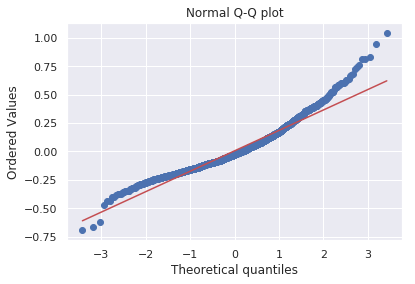

In [36]:
##Plot the residuals  -- ask about this because it was scaled..
import scipy.stats as stats
#resid = 10**model2.predict(X_test)-10**y_test
#stats.probplot(resid, dist="norm", plot=plt)
log_resid = model2.predict(X_test)-y_test
stats.probplot(log_resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [37]:
#dir(model2)
# model2.named_steps['elasticnetcv'].coef_

In [38]:
power_df = pd.DataFrame(model2.named_steps['polynomialfeatures'].powers_)
#power_df

In [39]:
power_df['coefficients'] = model2.named_steps['elasticnetcv'].coef_
power_df.sample(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,coefficients
213,0,1,1,0,0,0,0,1,0,0,0,0,0,-0.0
484,0,0,0,0,0,0,1,1,1,0,0,0,0,0.0
543,0,0,0,0,0,0,0,0,0,2,0,0,1,0.0
503,0,0,0,0,0,0,1,0,0,0,0,0,2,0.0
352,0,0,0,1,1,0,1,0,0,0,0,0,0,0.0
26,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.0
310,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0
286,0,0,1,1,1,0,0,0,0,0,0,0,0,0.0
63,0,0,0,0,1,0,0,1,0,0,0,0,0,0.0
255,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0


In [40]:
X.head()

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,0.357,0.75,0.875,0.081081,0.189189,0.000000,0.081081,0.054054,0.054054,0.540541,0.054054,2003,0.200000
1,0.667,0.00,0.750,0.062500,0.093750,0.031250,0.031250,0.093750,0.093750,0.781250,0.250000,2003,0.615385
2,0.333,0.00,0.000,0.000000,0.066667,0.066667,0.133333,0.033333,0.100000,0.266667,0.100000,2003,0.333333
3,0.750,0.00,0.500,0.000000,0.034483,0.068966,0.137931,0.000000,0.103448,0.241379,0.103448,2003,0.750000
4,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,0.000000


In [41]:
X.columns

Index(['fg_pct', '3_pct', 'ft_pct', 'fg3_per_mp', 'ft_per_mp', 'or_per_mp',
       'dr_per_mp', 'asst_per_mp', 'fouls_per_mp', 'points_per_mp',
       '2s_per_mp', 'year', 'fg2_pct'],
      dtype='object')

In [42]:
newnames = list(X.columns)
newnames.append('coefficients')
power_df.columns = newnames
power_df.head()

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,coefficients
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.002953
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000


In [43]:
power_df.drop(columns=['fg3_per_mp','ft_per_mp','or_per_mp','2s_per_mp','year'], axis=1)
power_df.sort_values('coefficients', ascending=False).head(25)

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,coefficients
105,3,0,0,0,0,0,0,0,0,0,0,0,0,0.014810
274,0,0,3,0,0,0,0,0,0,0,0,0,0,0.014542
189,1,0,0,0,0,0,0,0,0,1,0,0,1,0.011830
312,0,0,1,0,0,0,2,0,0,0,0,0,0,0.010157
111,2,0,0,0,0,0,1,0,0,0,0,0,0,0.009439
268,0,1,0,0,0,0,0,0,0,0,2,0,0,0.007102
253,0,1,0,0,0,0,0,2,0,0,0,0,0,0.004063
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0.003477
476,0,0,0,0,0,0,3,0,0,0,0,0,0,0.003310
246,0,1,0,0,0,0,2,0,0,0,0,0,0,0.003211


In [44]:
power_df.sort_values('coefficients').head(11)

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,coefficients
77,0,0,0,0,0,0,2,0,0,0,0,0,0,-0.029217
104,0,0,0,0,0,0,0,0,0,0,0,0,2,-0.026339
90,0,0,0,0,0,0,0,0,2,0,0,0,0,-0.026140
14,2,0,0,0,0,0,0,0,0,0,0,0,0,-0.013731
101,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.013558
69,0,0,0,0,0,2,0,0,0,0,0,0,0,-0.010584
60,0,0,0,0,2,0,0,0,0,0,0,0,0,-0.008834
84,0,0,0,0,0,0,0,2,0,0,0,0,0,-0.005003
50,0,0,0,2,0,0,0,0,0,0,0,0,0,-0.003734
22,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.000995


Text(0.5, 1.0, 'Correlations between log(minutes played) and gameplay features')

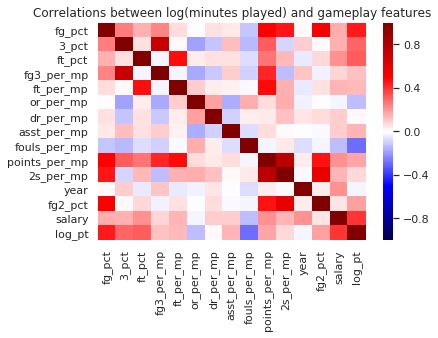

In [45]:
sns.heatmap(pay_df.drop(columns='minutes_played').corr(), vmin=-1, vmax=1, cmap='seismic').set_title('Correlations between log(minutes played) and gameplay features')

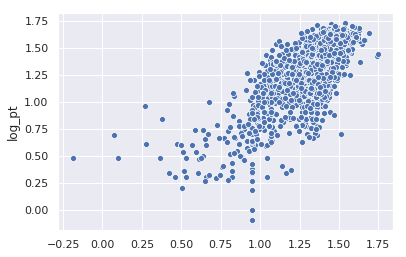

In [46]:
sns.scatterplot(x=model2.predict(X_test),y=y_test)

In [47]:
model3 = LinearRegression()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.36820262032670076

In [48]:
simple_df3 = pd.DataFrame([model3.coef_])
simple_df3.columns = X.columns
simple_df3

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,0.122433,0.084221,0.061674,-1.012516e+12,-7.064887e+11,-0.014002,0.011291,0.025755,-0.051654,1.902535e+12,-1.482539e+12,-0.008076,0.007603


In [49]:
lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
score = 0
for ratio in range(11):
    model = ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10)
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) > score:
        score = model.score(X_test,y_test)
        optimal_model = model
        optimal_ratio = ratio

print(score)
print(optimal_ratio)

0.3685143239255636
1


In [50]:
optimal_model.coef_

array([ 0.12129896,  0.08287339,  0.06144027, -0.04685586,  0.01906974,
       -0.01470603,  0.01069682,  0.02597514, -0.05219942, -0.03939864,
       -0.01332438, -0.00812521,  0.00713164])

In [51]:
simple_df4 = pd.DataFrame([optimal_model.coef_])
simple_df4.columns = X.columns
simple_df4

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,0.121299,0.082873,0.06144,-0.046856,0.01907,-0.014706,0.010697,0.025975,-0.052199,-0.039399,-0.013324,-0.008125,0.007132


In [52]:
#Experimenting with thaking out points per minute

trim_df = pay_df.drop(columns=['minutes_played','points_per_mp','team','name'])
trim_df.head()
X_scaled = scaler.fit_transform(trim_df.drop(columns='log_pt'))
y = trim_df.log_pt
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [53]:
#Searching for optimal lambda and ratio, commented for computation time

# lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
# score = 0
# for ratio in range(11):
#     model = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10))
#     model.fit(X_train,y_train)
#     if model.score(X_test,y_test) > score:
#         score = model.score(X_test,y_test)
#         optimal_model = model
#         optimal_ratio = ratio

# print(score)
# print(optimal_ratio)

0.5102496983683158
3


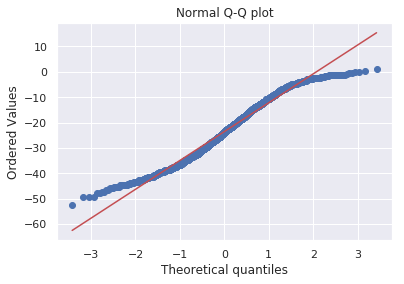

In [54]:
log_resid = optimal_model.predict(X_test)-10**y_test
stats.probplot(log_resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [55]:
trim_df['root_pt'] = (10**trim_df.log_pt)**0.5
X_scaled = scaler.fit_transform(trim_df.drop(columns=['log_pt','root_pt'],axis=1))
y = trim_df.root_pt
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [56]:
#More gridsearching, commented for runtime

# lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
# score = 0
# for ratio in range(11):
#     model = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10))
#     model.fit(X_train,y_train)
#     if model.score(X_test,y_test) > score:
#         score = model.score(X_test,y_test)
#         optimal_model = model
#         optimal_ratio = ratio

# print(score)
# print(optimal_ratio)

0.628557604101275
5


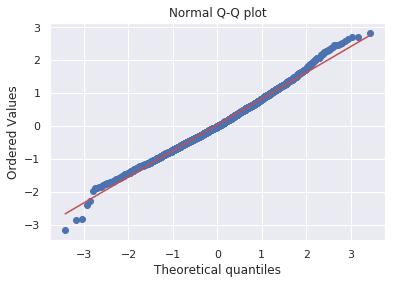

In [57]:
# model123 = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=1,l1_ratio=0.2))
#optimal_model.named_steps['elasticnetcv'].alpha_

log_resid = optimal_model.predict(X_test)-y_test
stats.probplot(log_resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Neural Net Experimentation!

In [58]:
from sklearn import neural_network
import multiprocessing as multi

In [59]:
# def nn_train(alphas):
#     top_score = 0
#     count = 0
#     hyper_params = []
#     for alpha in alphas:
#         for i in range(1,9):
#             for j in range(1,9):
#                 for k in range(1,9):
#                     model = neural_network.MLPRegressor((i,j,k), alpha=alpha)
#                     model.fit(X=X_train,y=y_train)
#                     if model.score(X=X_test,y=y_test) > top_score:
#                         top_score = model.score(X=X_test,y=y_test)
#                         opt_nn = model
#                         hyper_params = [(i,j,k),alpha]
#                     print(count + 1)
#                     count += 1
#     print(top_score)
#     print(hyper_params)
                        

# def workload(n,alphas):
#     return np.array_split(alphas,n)

# def main():
#     cpus = multi.cpu_count()
#     alphas = [0.001,0.01,0.1,0,1,10,100]
#     chunks = workload(cpus,alphas)
#     workers = []
#     for cpu in range(cpus):
#         worker = multi.Process(name=str(cpu),
#                                target=nn_train, #target function
#                                args=(chunks[cpu],)) #Workload per processer 
#         worker.start()
#         workers.append(worker)

#     for worker in workers:
#         worker.join()

# main()

In [60]:
#1,4,1 alpha = 10 score is 0.34
#7,8,8 alpha = 1.0 score is 0.63
#8,6,3 alpha = 0.1 score is 0.67
#7,5,4 alpha = 0.01 score is 0.62
#8,7,8 alpha = 0.001 score is 0.64
#8,4,7 alpha = 0 score is 0.64

nnmodel = neural_network.MLPRegressor((8,6,3), alpha = 0.1)
nnmodel.fit(X=X_train,y=y_train)
nnmodel.score(X=X_test,y=y_test)

0.6897269719778415

In [61]:
# def nn_train(alphas):
#     top_score = 0
#     count = 0
#     hyper_params = []
#     for alpha in alphas:
#         for i in range(1,9):
#             for j in range(1,9):
#                 for k in range(1,9):
#                     for l in range(1,9):
#                         model = neural_network.MLPRegressor((i,j,k), alpha=alpha)
#                         model.fit(X=X_train,y=y_train)
#                         if model.score(X=X_test,y=y_test) > top_score:
#                             top_score = model.score(X=X_test,y=y_test)
#                             opt_nn = model
#                             hyper_params = [(i,j,k,l),alpha]
#                         print(count + 1)
#                         count += 1
#     print(top_score)
#     print(hyper_params)
                        

# def workload(n,alphas):
#     return np.array_split(alphas,n)

# def main():
#     cpus = multi.cpu_count()
#     alphas = [0.001,0.01,0.1,0,1]
#     chunks = workload(cpus,alphas)
#     workers = []
#     for cpu in range(cpus):
#         worker = multi.Process(name=str(cpu),
#                                target=nn_train, #target function
#                                args=(chunks[cpu],)) #Workload per processer 
#         worker.start()
#         workers.append(worker)

#     for worker in workers:
#         worker.join()

# main()

In [62]:
# alpha = 0.01 (8,8,4,3) score = 0.65
# alpha = 0.1 (8,7,8,4) score = 0.68
nn_model2 = neural_network.MLPRegressor((8,7,8,5), alpha=0.1)
nn_model2.fit(X=X_train,y=y_train)
nn_model2.score(X=X_test,y=y_test)

0.5856498077511304